<a href="https://colab.research.google.com/github/gchomatas/MachineLearning/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uninstall tensorflow 1.x and install 2.0

In [0]:
#!pip uninstall tensorflow

In [0]:
#!pip install tensorflow-gpu==2.0.0

# Import tensorflow and check if we are running with **GPU support**

In [42]:
import tensorflow as tf

print(tf.__version__)

device_name = tf.test.gpu_device_name()
print("GPU is available: {}".format(tf.test.is_gpu_available()))

print('Device name: {}'.format(device_name))

2.0.0
GPU is available: True
Device name: /device:GPU:0


# Import keras and load mnist dataset

In [0]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

(tr_img, tr_labels), (test_img, test_labels) = mnist.load_data()

# Check imported arrays shape

In [44]:
tr_img.shape

(60000, 28, 28)

In [45]:
tr_labels.shape

(60000,)

# Display one of the 60K (28 * 28) matrixes, i.e. let's see what digit it represents

(28, 28)


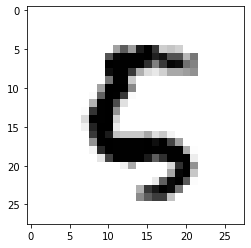

In [46]:
import matplotlib.pyplot as plt

digit = tr_img[2000]
print(digit.shape)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# Create Sequential model and add two fully connected layers
The first layer should provide the input vector shape, then the shape of inner layers is inferred.

In [0]:
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

# Compile our model with a loss function and an optimizer
Use *accuracy* as the metric to be evaluated during training and testing.

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the training and testing images to feed each digit as a sequence of 28 * 28 numbers
Also turn numbers from (0, 255) range to (0, 1)

In [0]:
tr_img = tr_img.reshape(60000, 28 * 28)
test_img = test_img.reshape(10000, 28 * 28)
tr_img = tr_img.astype('float32') / 255
test_img = test_img.astype('float32') / 255

# Turn the labels to their corresponding categorical vector
E.g. 7 = [0,0,0,0,0,0,0,1,0,0]

In [0]:
from tensorflow.keras.utils import to_categorical

tr_labels = to_categorical(tr_labels)
test_labels = to_categorical(test_labels)

# Fit the model and evaluate it using the test data
Print the model loss and accuracy when running on the test data

In [0]:
model.fit(tr_img, tr_labels, epochs=5, batch_size=128)

In [0]:
test_loss, test_accuracy = model.evaluate(test_img, test_labels)

In [0]:
print(test_loss, test_accuracy)

0.06780018774718047 0.978
